# **Análisis Cluster**
El análisis cluster, o análisis de conglomerados, es una técnica estadística multivariante, cuyo objetivo es agrupar los elementos o variables análizadas en distintos grupos (clusters) en función de la homogeneidad existente entre ellas. 

En este caso nos vamos a centrar en el **método jerárquico**. Este método puede ser aglomerativo o divisivo, dependiendo si partimos de cluster individuales que se van conbinando y que convergen en uno solo o divisivo si es de forma opuesta. 

La gran diferencia con el método K-means es que este no requiere que se especifique de forma previa con cuantos cluster queremos contar. 

Para llevar a cabo nuestro ejemplo, escogeremos el dataset **desigualdad_ccaa**, elaborado a partir de los datos publicados por el INE.

## **Jerárquico**

Cargamos las librerias que vamos a utilizar en el modelo.

In [ ]:
# Preparación de los datos 
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
# Modelado 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
# Visualización
import matplotlib.pyplot as plt


Subimos a Colab el archivo que vamos a utilizar, en nuestro caso es **desigualdad_ccaa**.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving desigualdad_ccaa.xlsx to desigualdad_ccaa.xlsx


Visualizamos los datos del archivo que acabamos de cargar.

In [ ]:
datos=pd.read_excel('desigualdad_ccaa.xlsx')
datos.head()

,CCAA,PIBpc,Rmedper,Rmedhog,Riespob,Evidanac,Tmortinf,Salmal,Analf,Salmed,Salmedmuj,Salmedhom,Paro,Parojuv,Parold,Ocuptc,Condhog,Gastomedper,Gastomedhog,Seg,Mencond,Pobsed,Satisviv,Satiseco,Satistrab,Probviv,Emp,Empind,Empcons,Empcotrahos,Empserv,Pobactdisc,Pobactnodisc,Vivord,Vivint,Vivfijo,Vivmovil,Niñomovil,Niñordena,Niñoint,Sobremay,Obemay,Sobremen,Obemen,Poblfum,Poblbeb,Empord,Empint,Empweb,Empsoc
0,Andalucía,19633,9160,23826,31.3,82.22,3.17,7.75,2.6,21805.92,18672.11,24712.69,21.19,41.69,32.5,84.6,1.37,10602.70,27532.66,5.5,0.17,39.47,7.3,5.6,7.0,71.0,531045,28395,57938,212817,231895,30.2,73.9,76.8,94.7,61.8,99.3,67.6,85.5,91.3,37.5,21.0,20.9,12.5,22.7,16.2,99.2,98.2,71.5,54.3
1,Aragón,28727,12300,29672,17.9,83.90,2.14,6.54,0.7,23531.83,20074.25,26640.59,10.03,27.35,28.4,86.2,1.24,12775.48,30716.04,3.8,0.13,37.32,7.4,6.0,7.0,81.5,90682,6532,11787,31636,40727,40.0,79.9,85.0,96.3,80.0,99.7,71.2,96.1,93.5,36.8,15.7,18.2,2.5,24.1,19.0,99.2,98.3,85.4,64.7
2,"Asturias, Principado de",23299,12523,27897,20.7,82.83,2.66,6.53,0.5,23914.61,19744.94,27912.91,14.19,28.70,41.5,86.1,0.35,12317.84,27367.02,1.8,0.21,33.92,7.5,6.3,6.9,69.9,68433,3495,8133,26459,30346,31.6,74.0,79.2,93.4,69.8,99.0,65.7,94.9,95.3,37.4,21.7,18.2,7.9,23.8,18.3,98.9,98.1,81.6,61.3
3,"Balears, Illes",28213,12410,32179,12.0,83.71,3.25,4.99,1.5,22800.87,21085.74,24437.58,11.74,29.18,16.7,87.3,1.07,12765.75,33125.73,3.6,0.24,39.58,7.7,5.9,7.3,65.4,100022,4834,17291,31172,46725,38.5,79.7,85.2,95.6,75.4,98.9,68.7,95.1,98.5,31.1,15.5,23.0,10.0,23.1,16.7,99.3,97.6,81.4,73.0
4,Canarias,21244,9487,24565,28.5,82.79,2.72,7.55,1.6,20763.48,19051.01,22333.63,20.49,42.18,34.0,87.1,1.34,9851.50,25389.65,6.4,0.26,41.49,7.1,5.6,7.1,76.1,152756,5677,16951,58466,71662,25.8,75.8,80.5,96.2,81.8,99.5,65.4,91.4,90.4,37.2,19.3,25.2,10.4,22.3,6.6,98.3,97.8,67.8,62.8


Creamos las diferentes variables que vamos a utilizar. En este caso, en la variable columnas, seleccionaremos las que vamos a analizar, en nuestro caso, el salario medio anual de mujeres y hombres. Después, la lista que acabamos de crear, la convertimos en un DataFrame (resultado). Además, también tenemos nuestra serie con las comunidades autónomas. 

In [ ]:
columnas = ["Salmedmuj", "Salmedhom"]
resultado = datos[columnas]
comunidades = datos["CCAA"]

### **Dendrograma**
Para representar gráficamente nuestro modelo, escogeremos una tipología como la del dendrograma, ya que nos permitirá observar los dintintos cluster que se han formado, las relaciones entre las diferentes variables y la distancia entre unas y otras. 

Además, en nuestro caso seleccionaremos que las variables se situen a la izquierda, es decir, situaremos el dendrograma a la derecha, para que podamos leer las variables sin ningún tipo de problema. 

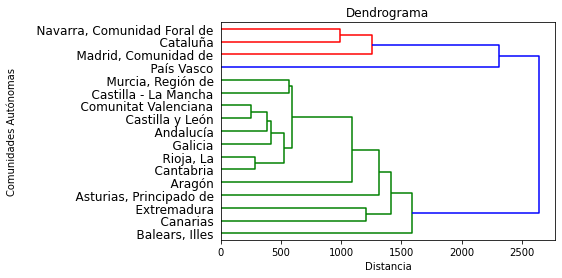

In [ ]:
W = hierarchy.linkage(resultado, 'single')
dendrograma = sch.dendrogram(W,labels=np.array(comunidades),orientation='right')

plt.title('Dendrograma')
plt.xlabel('Distancia')
plt.ylabel('Comunidades Autónomas')
plt.show()


### **Matriz de distancias**
Para ver numéricamente la distancia entre nuestras variables (CCAA), realizamos la matriz de distancias, la cual nos muestra la distancia euclídea entre los puntos analizados, siendo una matriz *n x n*.

Inicialmente tenemos el vector con las distancias entre los datos analizados, a través de **pdist( )**. Posteriormente, **squareform( )** convierte el vector de distancia en una matriz de distancia. Por último, contruimos nuestra matriz. 

In [ ]:
dist=pdist(resultado)  

DIST=squareform(dist) 

df=pd.DataFrame(DIST,index=comunidades,columns=comunidades) 
pd.set_option('precision',1)
df.head()

CCAA,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
CCAA,,,,,,,,,,,,,,,,,
Andalucía,0.0,2383.9,3375.3,2429.3,2409.0,1150.0,384.4,860.3,5339.8,590.3,3000.8,878.5,7324.7,1045.0,6290.2,9471.1,1408.1
Aragón,2383.9,0.0,1314.2,2424.1,4426.8,1365.8,2178.8,2855.9,2984.6,2264.5,5282.1,1889.8,4992.1,3316.7,3914.6,7094.8,1090.4
"Asturias, Principado de",3375.3,1314.2,0.0,3725.0,5622.3,2566.5,3272.1,4006.9,2646.9,3414.0,6369.9,3092.6,4593.9,4394.8,3374.2,6448.6,2319.8
"Balears, Illes",2429.3,2424.1,3725.0,0.0,2926.9,1717.5,2048.0,2053.2,4371.8,1852.7,4083.7,1590.9,6082.6,2602.8,5356.8,8379.8,1750.5
Canarias,2409.0,4426.8,5622.3,2926.9,0.0,3070.5,2380.4,1626.9,7089.7,2211.2,1205.6,2541.4,8930.6,1411.1,8081.9,11199.4,3338.2


Vamos a asignar los cluster a las CCAA.

t es la altura donde queremos realizar el corte en nuestro dendrograma.

Y le decimos que aplique un criterio de distancia

In [ ]:
clusters = fcluster(W, t=2000, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 3, 1], dtype=int32)

In [ ]:
clusters_ccaa=pd.concat([comunidades,pd.DataFrame(clusters)],axis=1)
clusters_ccaa.rename(columns={"CCAA":"Comunidades Autónomas",0:"Cluster"},inplace=True)
clusters_ccaa

,Comunidades Autónomas,Cluster
0,Andalucía,1
1,Aragón,1
2,"Asturias, Principado de",1
3,"Balears, Illes",1
4,Canarias,1
5,Cantabria,1
6,Castilla y León,1
7,Castilla - La Mancha,1
8,Cataluña,2
9,Comunitat Valenciana,1


Vamos a plasmar gráficamente la situación de los puntos en el plano. Lo primero que haremos será definir nuestra función a plasmar, en este caso situación. Después, utilizaremos la función ax.text( ) para que salgan los nombres de las CCAA, así como ax.set_xlim y ax.set_ylim para decirles en que puntos se mueven nuestros ejes. Por último, fig.set_figheight( ) y fig.set_figwidth( ) nos proporcionan la altura y anchura de nuestro gráfico respectivamente. 

Para poder solucionar el problema que presenta a la hora utilizar el DataFrame (resultado), utilizamos las función .iloc[ ] para acceder a los elementos que estamos analizando. 

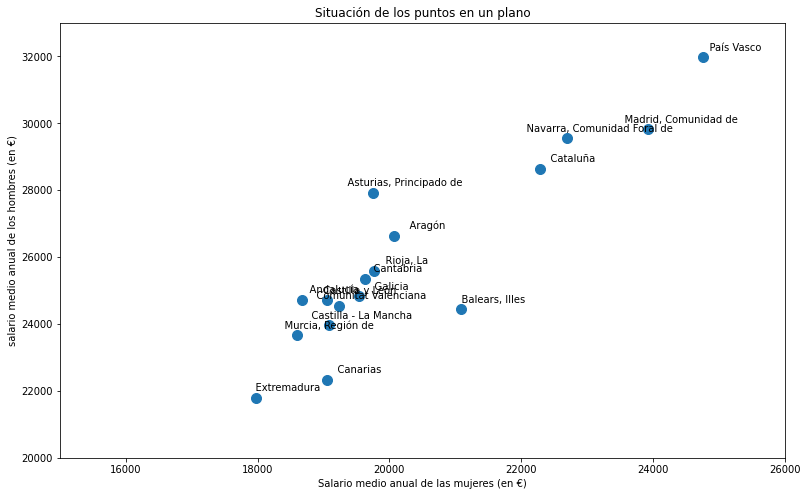

In [ ]:
def situacion(x,y,z):
    fig, ax = plt.subplots()
    ax.scatter(x, y, s=100)
    for i in range(17):       
      ax.text(x[i]+400,y[i]+300, z[i], color = 'black', ha = 'center', va = 'center')
    ax.set_xlim(15000,26000)
    ax.set_ylim(20000,33000)
    ax.set_title('Situación de los puntos en un plano')
    ax.set_xlabel('Salario medio anual de las mujeres (en €)')
    ax.set_ylabel('salario medio anual de los hombres (en €)')
    fig.set_figheight(8)
    fig.set_figwidth(13)
    fig.show()


situacion(resultado.iloc[:,0],resultado.iloc[:,1],comunidades)